Ch15 NumPy常见基础运算
# 习题答案
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Q1
$$ {\displaystyle f(x)=a\exp \left(-{\frac {(x-b)^{2}}{2c^{2}}}\right)} $$

您可以使用`numpy`和`matplotlib`库来绘制这个公式的图像。下面是一个示例代码，它将公式绘制成一个正态分布曲线：



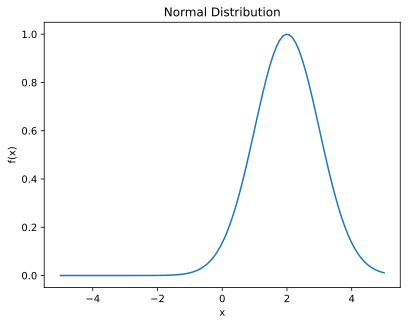

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

# 定义参数
a = 1
b = 2
c = 1

# 生成数据
x = np.linspace(-5, 5, 100)
y = f(x, a, b, c)

# 绘制图像
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Normal Distribution')
plt.show()



您可以将此代码复制到Visual Studio Code中的Python文件中，并运行它来查看结果。

In [22]:
a = 1
b = 2
c = 1
x_array = np.linspace(-6,6,121)
f_x_array = a * np.exp(-(x_array - b)**2/2/c**2)

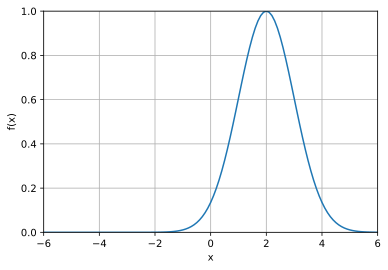

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x_array, f_x_array)
ax.set_xlim(-6, 6)
ax.set_ylim(0, f_x_array.max())    
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.grid()


# Q2
$$ {\displaystyle f(x_1, x_2)=\exp \left(-x_1^2 - x_2^2\right)} $$

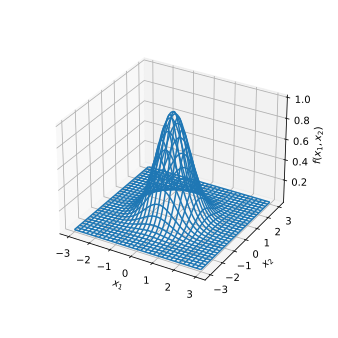

In [24]:
x1_array = np.linspace(-3, 3, 301)
x2_array = np.linspace(-3, 3, 301)
xx1, xx2 = np.meshgrid(x1_array, x2_array)
ff = np.exp(-xx1**2 - xx2**2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# 绘制二元函数网格曲面
ax.plot_wireframe(xx1, xx2, ff, rstride=10, cstride=10)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$f(x_1, x_2)$')
plt.tight_layout()
ax.set_box_aspect(aspect=None, zoom=0.8)


In [25]:
import plotly.graph_objs as go
import numpy as np

# 生成数据
x1_array = np.linspace(-3, 3, 301)
x2_array = np.linspace(-3, 3, 301)
xx1, xx2 = np.meshgrid(x1_array, x2_array)
ff = np.exp(-xx1**2 - xx2**2)

# 创建图像
fig = go.Figure(data=[go.Surface(x=xx1, y=xx2, z=ff)])

# 设置图像布局
fig.update_layout(
    title='二元函数网格曲面',
    scene=dict(
        xaxis_title='x1',
        yaxis_title='x2',
        zaxis_title='f(x1, x2)',
        aspectratio=dict(x=1, y=1, z=0.8),
        aspectmode='manual'
    )
)

# 显示图像
fig.show()

# Q3
$${\displaystyle f(x,y)={\frac {1}{2\pi \sigma _{X}\sigma _{Y}{\sqrt {1-\rho ^{2}}}}}\exp \left(-{\frac {1}{2(1-\rho ^{2})}}\left[\left({\frac {x-\mu _{X}}{\sigma _{X}}}\right)^{2}-2\rho \left({\frac {x-\mu _{X}}{\sigma _{X}}}\right)\left({\frac {y-\mu _{Y}}{\sigma _{Y}}}\right)+\left({\frac {y-\mu _{Y}}{\sigma _{Y}}}\right)^{2}\right]\right)}$$

In [26]:
sigma_X = 1
sigma_Y = 1
rho_XY  = 0.6
mu_X    = 0
mu_Y    = 0

In [27]:
# 定义一个函数

def f_XY_PDF(xx1, xx2, sigma_X, sigma_Y, rho_XY, mu_X, mu_Y):
    coeff = 2 * np.pi * sigma_X * sigma_Y * np.sqrt(1 - rho_XY**2)
    coeff = 1/coeff
    xx1_ = (xx1 - mu_X)/sigma_X
    xx2_ = (xx2 - mu_Y)/sigma_Y
    
    ellipse = 1/(1 - rho_XY**2) * (xx1_**2 - 2*rho_XY*xx1_*xx2_ + xx2_**2)
    PDF = coeff * np.exp(-1/2 * ellipse)
    
    return PDF
    

In [28]:
PDF_ff = f_XY_PDF(xx1, xx2, sigma_X, sigma_Y, rho_XY, mu_X, mu_Y)

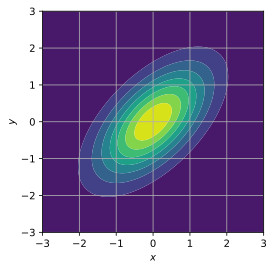

In [33]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.contourf(xx1, xx2, PDF_ff)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)    
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.grid()
ax.set_aspect('equal', adjustable='box')